# Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Dataset Importing

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

In [69]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Importing Data wiht the help of Pandas library.

# Exploratory Data Analysis EDA

In [70]:
#checking shape of data
df.shape

(30, 17)

In [71]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All features are Integer and one is float data type.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Try to find there is any null value presetn or Missing value.

In [73]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Null values are present.

# Statistic Summary

In [74]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Above Summary provide information about statistical parameters of data i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value.

# Data Visualization

<AxesSubplot:>

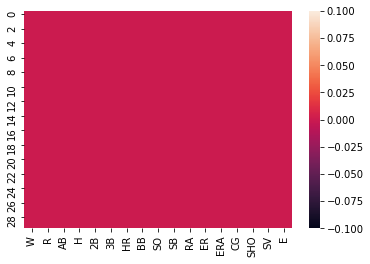

In [75]:
sns.heatmap(df.isnull())

Checking Missing value with the  help of Heatmap.

<AxesSubplot:>

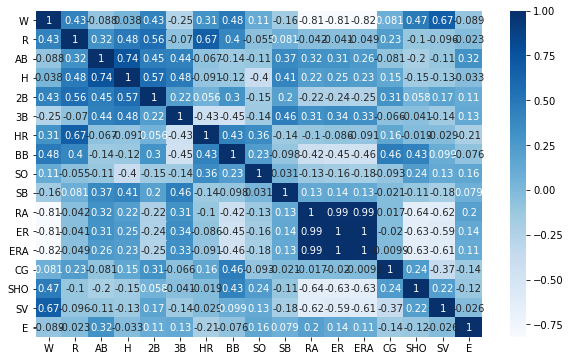

In [76]:
dfcor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Observations:- 
E,CG,SB,SO,3B,H,AB features are less correlated with Target Variable and others are good correlated 

# Univariate Analysis

Text(0.5, 1.0, 'Wins')

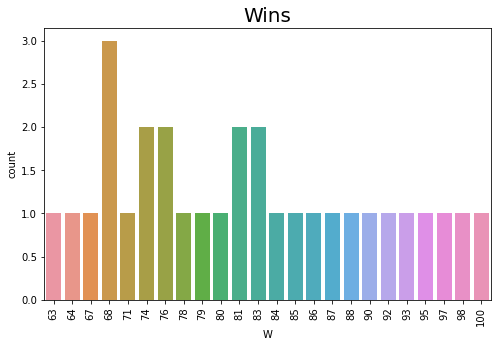

In [77]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="W")
plt.xticks(rotation=90)
plt.title("Wins", fontsize = 20)

In Wins column the 68 number is highest count and the number 74,76,81,83 are Second highest counts and other are on shape position.

Text(0.5, 1.0, 'Runs')

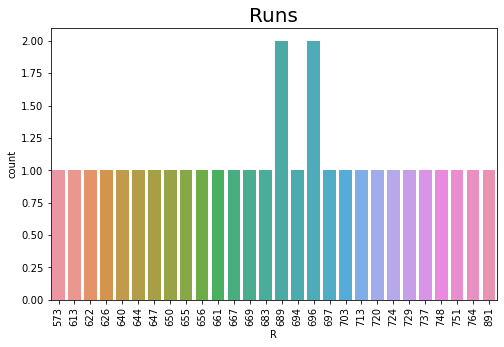

In [78]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="R")
plt.xticks(rotation=90)
plt.title("Runs", fontsize = 20)

In Runs column the number 689, 696 are highest counts and others are on same position.

Text(0.5, 1.0, 'At Bats')

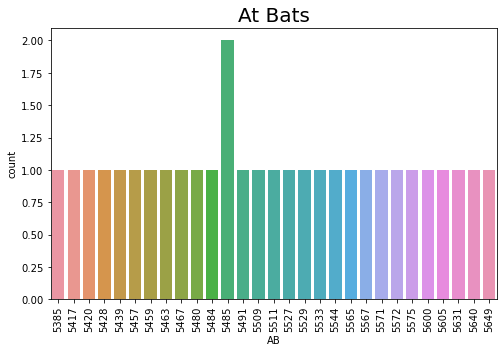

In [79]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="AB")
plt.xticks(rotation=90)
plt.title("At Bats", fontsize = 20)

In At Bats column the number 5485 is highest counts and others are on same position.

Text(0.5, 1.0, 'Hits')

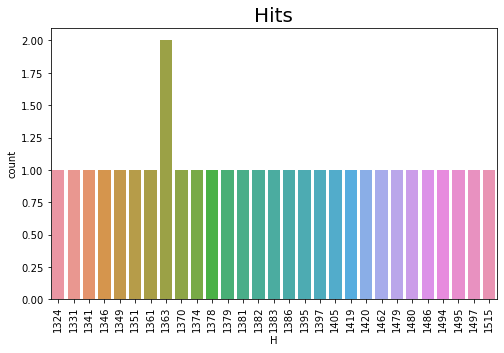

In [80]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="H")
plt.xticks(rotation=90)
plt.title("Hits", fontsize = 20)

In Hits column the number1363 is highest counts and others are on same position.

Text(0.5, 1.0, 'Doubles')

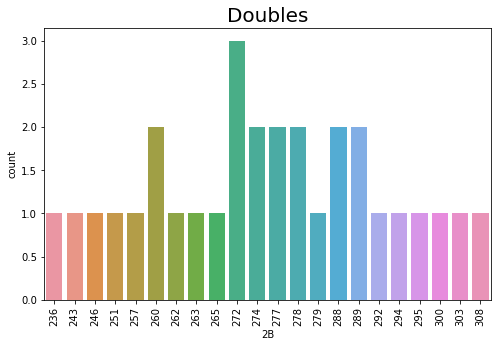

In [81]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="2B")
plt.xticks(rotation=90)
plt.title("Doubles", fontsize = 20)

In Doubles column the number 272 is highest counts and  the numbers 260,274,277,278,288,289 are Second highest others are on same position.

Text(0.5, 1.0, 'Triples')

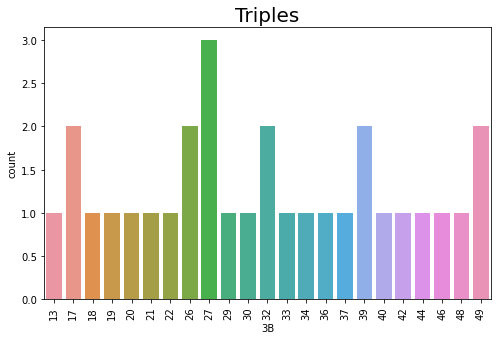

In [82]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="3B")
plt.xticks(rotation=90)
plt.title("Triples", fontsize = 20)

In Triples column the number 27 is highest counts and the numbers 17,26,32,39,49 are Second highest remainings are on same position.

Text(0.5, 1.0, 'Homeruns')

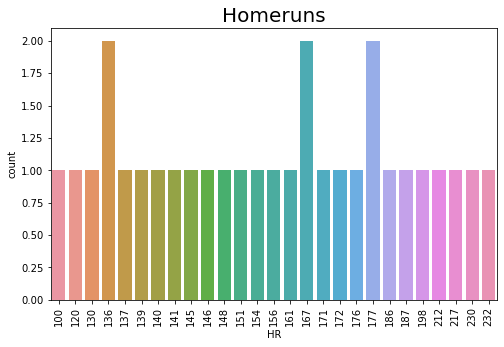

In [83]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="HR")
plt.xticks(rotation=90)
plt.title("Homeruns", fontsize = 20)

In Homeruns column the numbers 136,167,177 are highest counts and the remainings are on same position.

Text(0.5, 1.0, 'Base on ball')

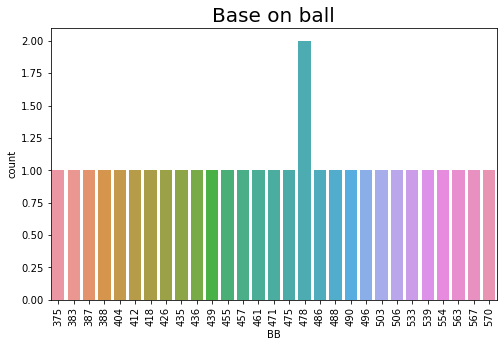

In [84]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="BB")
plt.xticks(rotation=90)
plt.title("Base on ball", fontsize = 20)

In Base on ball column the number 478 is highest counts and others are on same position.

Text(0.5, 1.0, 'Strikeouts')

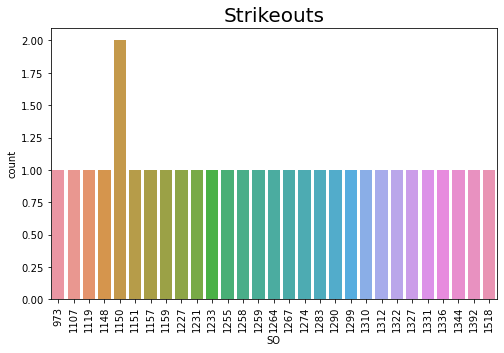

In [85]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SO")
plt.xticks(rotation=90)
plt.title("Strikeouts", fontsize = 20)

In Strikeouts column the numbers 1150 is highest counts and the remainings are on same position.

Text(0.5, 1.0, 'Stolen Bases')

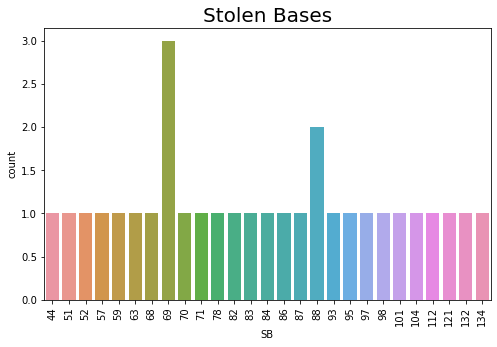

In [86]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SB")
plt.xticks(rotation=90)
plt.title("Stolen Bases", fontsize = 20)

In Stolen Bases column the number 69 is highest counts and the number 88 is second highest and the remainings are on same position.

Text(0.5, 1.0, 'Runs Allowed')

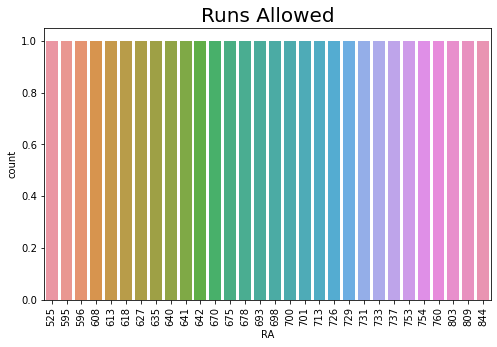

In [87]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="RA")
plt.xticks(rotation=90)
plt.title("Runs Allowed", fontsize = 20)

In Runs Allowed column all numbers are on same position and there is no variation

Text(0.5, 1.0, 'Earned Runs')

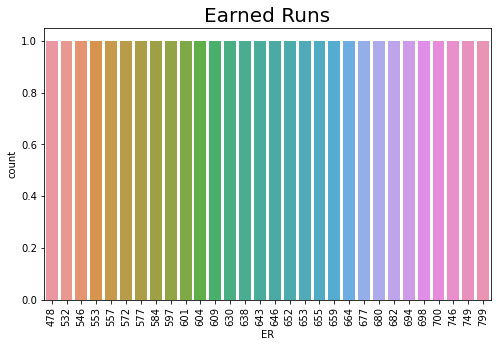

In [88]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="ER")
plt.xticks(rotation=90)
plt.title("Earned Runs", fontsize = 20)

In Earned Runs column all numbers are on same position

Text(0.5, 1.0, 'Earned Runs Average')

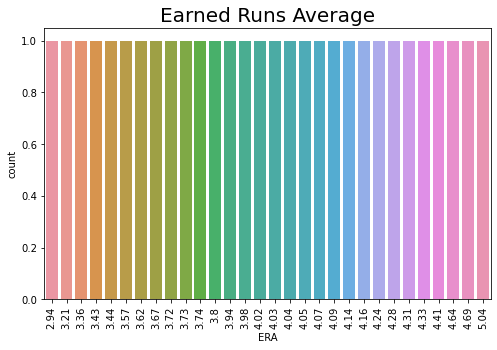

In [89]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="ERA")
plt.xticks(rotation=90)
plt.title("Earned Runs Average", fontsize = 20)

In Earned Runs Average column all numbers are on same position

Text(0.5, 1.0, 'Complete Game')

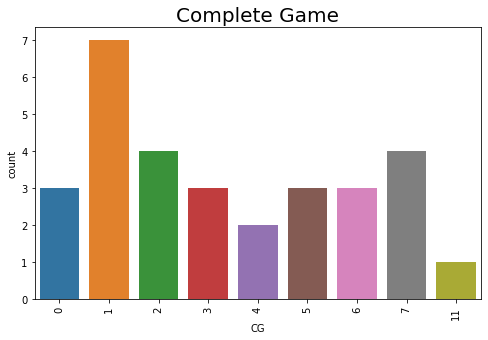

In [90]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="CG")
plt.xticks(rotation=90)
plt.title("Complete Game", fontsize = 20)

In Complete Game column the 1 is highest cout and 11 is lowest couts in all of numbers

Text(0.5, 1.0, 'Shutouts')

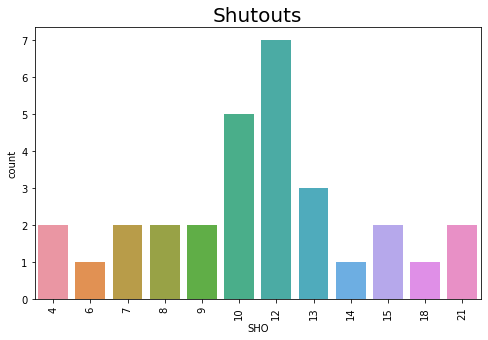

In [91]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SHO")
plt.xticks(rotation=90)
plt.title("Shutouts", fontsize = 20)

In Shutouts column the numbers 12 is highest cout and the numbes 6,14,18 are lowest and also on same position

Text(0.5, 1.0, 'Saves')

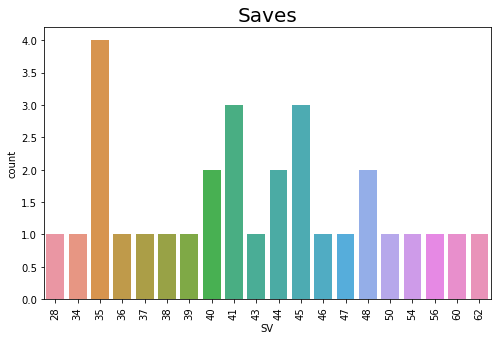

In [92]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SV")
plt.xticks(rotation=90)
plt.title("Saves", fontsize = 20)

The highest Save number is 35
The Second higest Saves number are 41,45
The third highest Saves numbers are 40,44,48

Text(0.5, 1.0, 'Error')

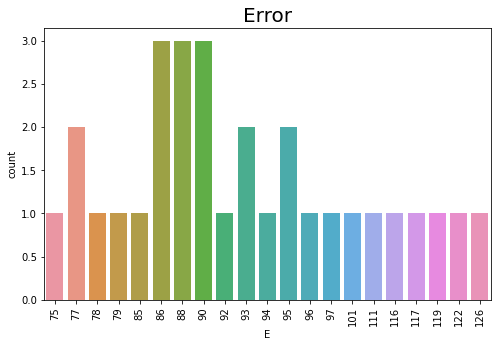

In [93]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="E")
plt.xticks(rotation=90)
plt.title("Error", fontsize = 20)

In Error column the highest Error numbers  are 86,88,90 and the second highest Error numbers are 77,93,95

# Bivariate Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


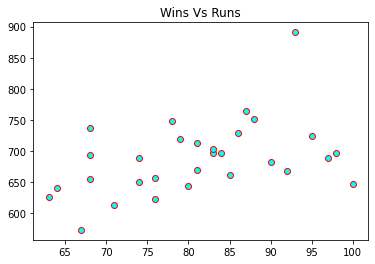

In [94]:
plt.scatter(df['W'],df['R'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Runs')
plt.show()

Checking relationship between Wins and Runs. The increasing numbers of runs and wins also increasing so there is positive relationship between both of them.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


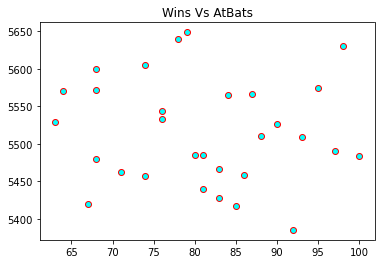

In [95]:
plt.scatter(df['W'],df['AB'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs AtBats')
plt.show()

The values are scatter so there are week relationship between Wins and AtBats. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


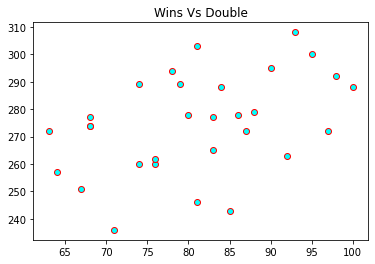

In [96]:
plt.scatter(df['W'],df['2B'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Double')
plt.show()

Getting good and positive relationship in Wins and Double 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


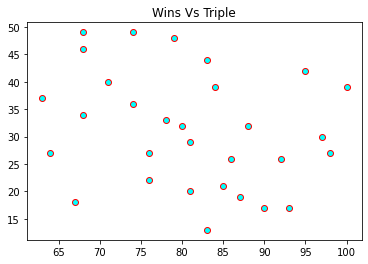

In [97]:
plt.scatter(df['W'],df['3B'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Triple')
plt.show()

The values are decreasing and showing negative relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


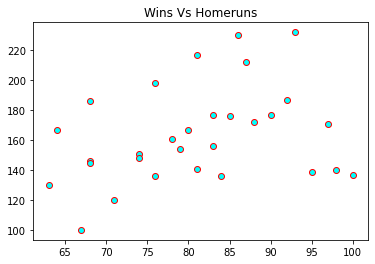

In [98]:
plt.scatter(df['W'],df['HR'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Homeruns')
plt.show()

the values of Wins and Homeruns showing positive relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


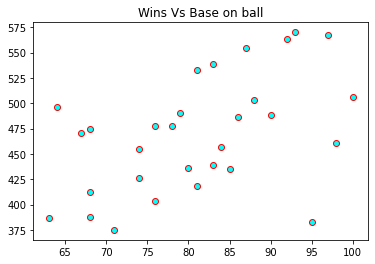

In [99]:
plt.scatter(df['W'],df['BB'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Base on ball')
plt.show()

The values are increasing as we are getting so there is positive relationship between Wins and Base on Ball 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


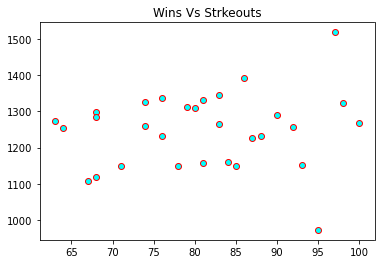

In [100]:
plt.scatter(df['W'],df['SO'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Strkeouts')
plt.show()

Positive relationship Between Wins and Strikeouts. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


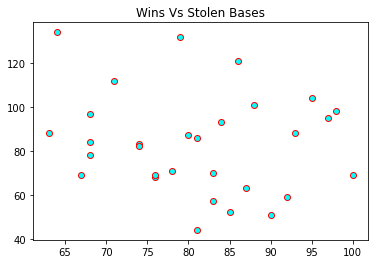

In [101]:
plt.scatter(df['W'],df['SB'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Stolen Bases')
plt.show()

As we are getting the values are spreaded but there is positive relationship between Wins and Stolen Bases.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


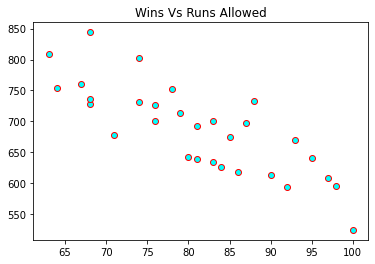

In [102]:
plt.scatter(df['W'],df['RA'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Runs Allowed')
plt.show()

If Allowed runs are decreasing the Wins also decreasing so there negative relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


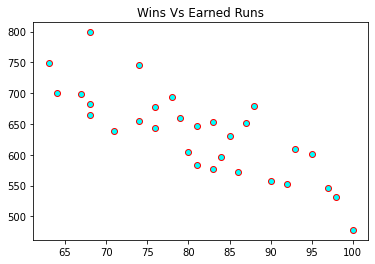

In [103]:
plt.scatter(df['W'],df['ER'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Earned Runs')
plt.show()

If Earned runs are decreasing the Wins also decreasing so there negative relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


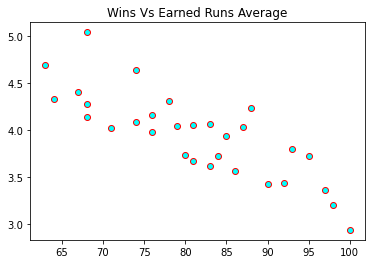

In [104]:
plt.scatter(df['W'],df['ERA'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Earned Runs Average')
plt.show()

If Allowed runs average are decreasing the Wins also decreasing so there negative relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


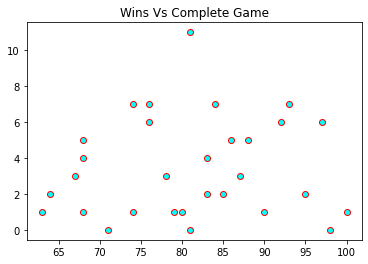

In [105]:
plt.scatter(df['W'],df['CG'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Complete Game')
plt.show()

Positive relationship between Wins and Complete Game.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


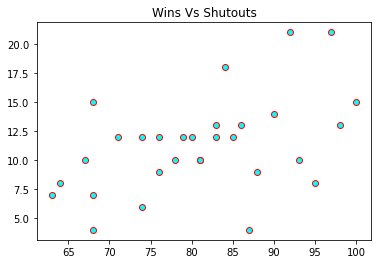

In [106]:
plt.scatter(df['W'],df['SHO'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Shutouts')
plt.show()

There is positive relationship between Wins and Shutouts the values are increasing.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


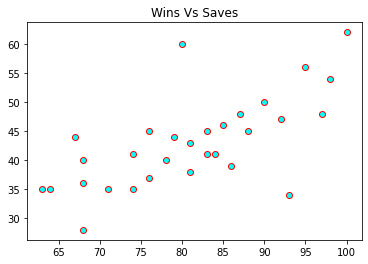

In [107]:
plt.scatter(df['W'],df['SV'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins Vs Saves')
plt.show()

The Wins and Saves both are increasing and showing positive relation.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


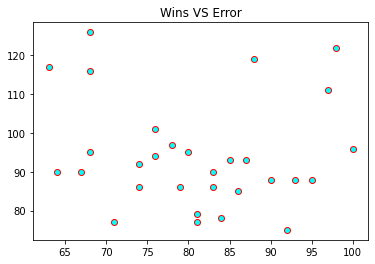

In [108]:
plt.scatter(df['W'],df['E'],alpha=1,c=(0,1,1),edgecolors='r')
plt.title('Wins VS Error')
plt.show()

there is no good relationship between Wins and Erros because the values are spreaded more.

# Multivariate Analysis

In [109]:
#sns.pairplot(df)

In [110]:
collist=df.columns.values
ncol=7
nrows=4

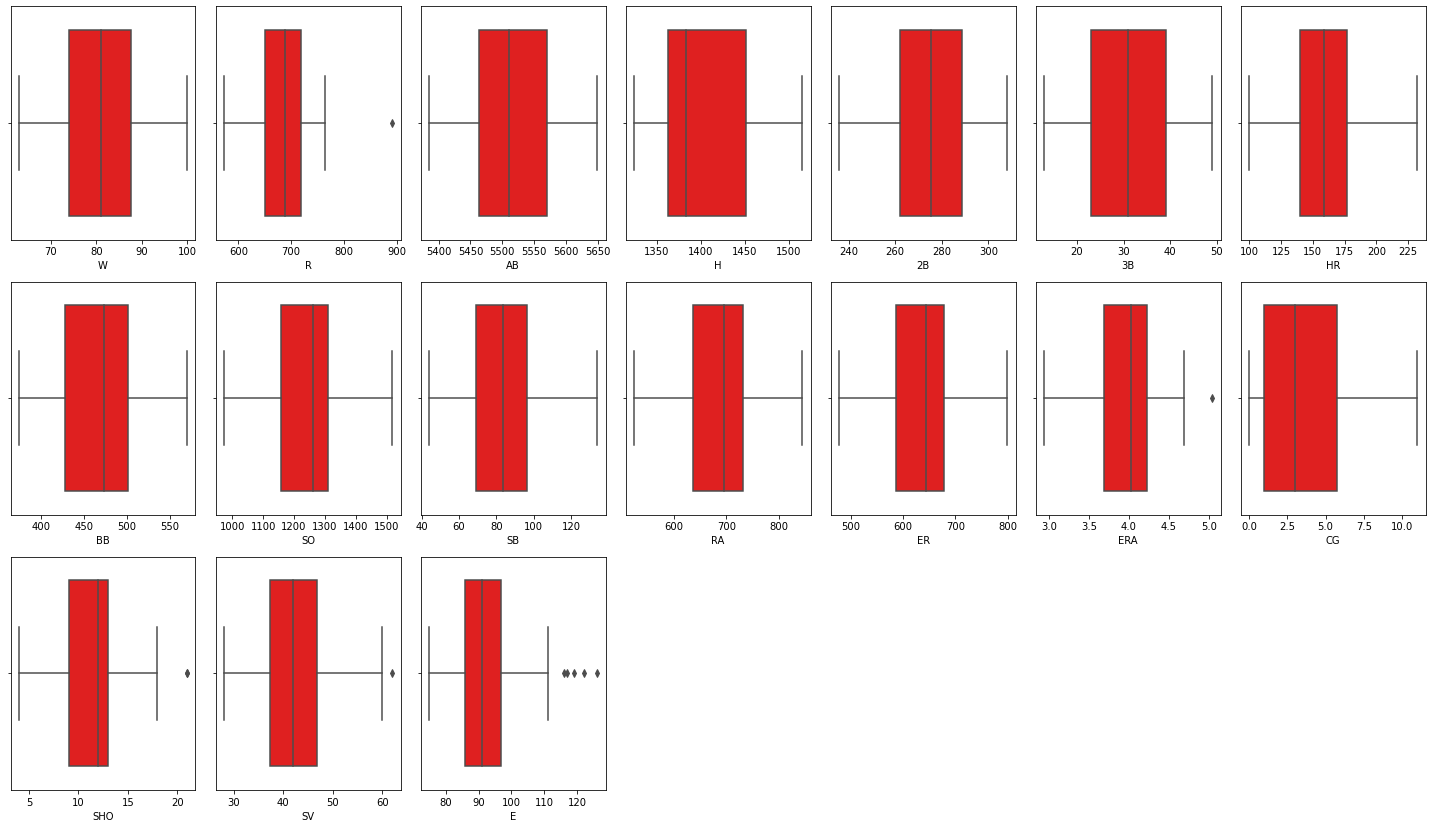

In [111]:
plt.figure(figsize=(20,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Red', orient='v')
    plt.tight_layout()

Ploting Boxplot to find all features outliers in a one place and as we are getting the outliers are present in R,ERA, SHO, SV and E columns.

# Zscore Value

In [112]:
from scipy.stats import zscore

In [113]:
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

Applying Zscore value to entire data for removing outliters.

In [114]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


Setting threshold value and the threshold value is 3.

In [115]:
z[5][1]

3.5096470447193067

Only one value that is more than threshold point.

In [116]:
df_new=df[(z<3).all(axis=1)]

The values we have know that are below 3.

In [117]:
#Checking Old data shape
df.shape

(30, 17)

In [118]:
#New data shape after apply Zscore value
df_new.shape

(29, 17)

In [119]:
(1/30)*100

3.3333333333333335

If We checked how much data we are loosing after using Zscore functionality then we are loosing apporx 3% of data.

# Handling Skewness

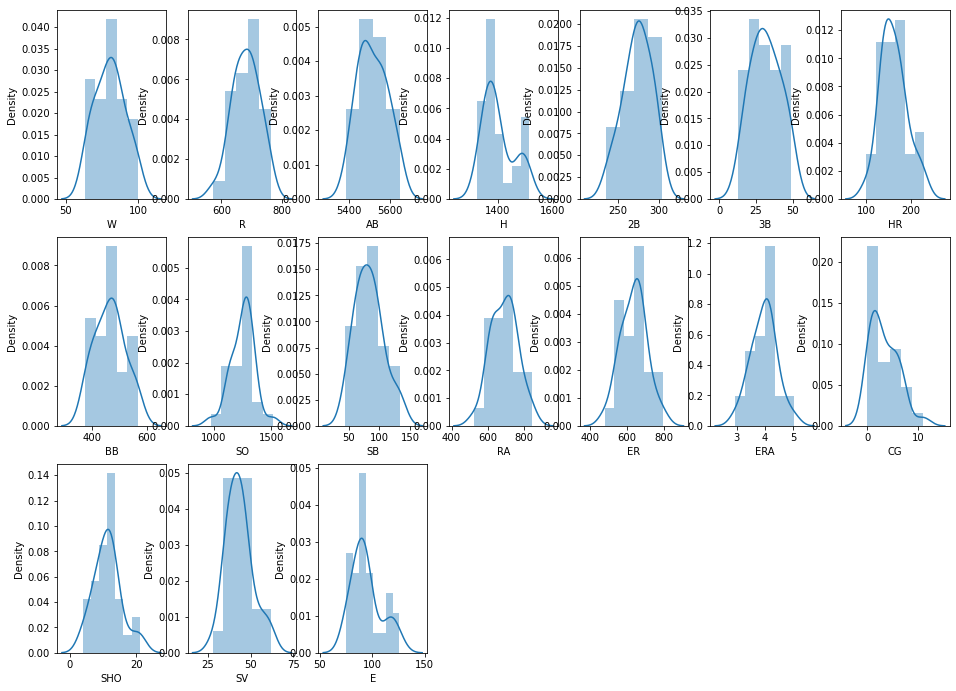

In [120]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

skewness is present in few columns.The H,CG,E columns have psitive Right Trail Skewness but these are not more affact the prediction.

In [121]:
df_new['H']=np.log1p(df_new['H'])

In [122]:
df_new['CG']=np.log1p(df_new['CG'])

In [123]:
df_new['E']=np.log1p(df_new['E'])

In [124]:
from scipy.stats import boxcox
df_new['H']=boxcox(df_new['H'],1)

In [125]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.627480
E      0.586101
dtype: float64

We removed Skewness from data.

# Spliting the Dependent and Target Variables.

In [126]:
x=df_new.drop('W',axis=1)
y=df_new['W']

In [127]:
#checking Dependent variable shape after spliting.
x.shape

(29, 16)

In [128]:
#checking target variable shape after spliting.
y.shape

(29,)

# Data Scaling using MinMaxScaler

In [129]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.790576,0.719697,0.911301,0.955224,0.805556,0.300000,0.041667,0.000000,0.666667,0.363636,0.383178,0.376190,0.442114,0.235294,0.823529,0.307531
1,0.643979,0.310606,0.138807,0.611940,0.861111,0.430769,0.333333,0.533945,0.288889,0.548589,0.545171,0.538095,0.442114,0.470588,0.500000,0.263266
2,0.502618,0.204545,0.387624,1.000000,0.444444,0.315385,0.822917,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.099899
3,0.256545,0.560606,0.312776,0.358209,0.388889,0.276923,0.151042,0.473394,0.266667,0.551724,0.514019,0.495238,0.836829,0.294118,0.264706,0.573059
4,0.607330,0.833333,1.000000,0.791045,1.000000,0.392308,0.416667,0.524771,0.433333,0.871473,0.834891,0.809524,0.836829,0.470588,0.205882,0.263266
5,1.000000,0.689394,0.398255,0.537313,0.166667,0.861538,0.932292,0.466055,0.211111,0.542320,0.542056,0.519048,0.557886,0.000000,0.588235,0.413984
6,0.732984,0.378788,0.253433,0.149254,0.194444,0.900000,0.223958,0.656881,0.000000,0.526646,0.523364,0.528571,0.000000,0.352941,0.441176,0.050590
7,0.371728,0.378788,0.323515,0.626866,0.527778,0.515385,0.317708,0.618349,0.477778,0.366771,0.392523,0.380952,0.278943,0.470588,0.941176,0.454987
8,0.916230,0.965909,0.901380,0.865672,0.555556,0.469231,0.536458,0.321101,0.300000,0.714734,0.672897,0.652381,0.557886,0.352941,0.352941,0.495145
9,0.931937,0.477273,0.514206,0.641791,0.527778,0.553846,0.666667,0.477064,0.633333,0.652038,0.629283,0.619048,0.721057,0.294118,0.500000,0.889580


All dependent variable features scale between -1 to +1 and there is no negative value.

In [130]:
X=dx

# Find Random State Parameter

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predf = LR.predict(X_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9442145135642664  on Random State  757


Random state=757 and the best accuracy is 94%

# Spliting X and y into Train data and Test data for model building.

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=757)

In [133]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(23, 16) (23,) (6, 16) (6,)


# Model Building

# Linear Regression

In [134]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
lr.coef_

array([  28.99388531,  -16.95832914,    8.1994911 ,   -7.03284452,
          0.67487334,   -8.05348875,   -6.12767763,    1.02722336,
         -3.28173544,   40.29161018,  108.50865973, -180.25919257,
          6.61244335,    4.17039968,   18.09586985,   -0.64552559])

In [136]:
lr.score(X_train,y_train)

0.9362743517401035

In [137]:
pred=lr.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [83.30748623 60.55620725 94.55459222 69.87999127 57.83059578 74.98125334]
error:
Mean absolute error: 2.0441381520793427
Mean squared error: 7.241266058727299
Root Mean Squared error: 2.690960062640711
0.9442145135642664


# Random Forest Regressor

In [138]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred=rf.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [79.92 75.48 80.99 76.11 72.15 76.85]
error:
Mean absolute error: 7.780000000000001
Mean squared error: 81.29566666666672
Root Mean Squared error: 9.016410963718696
0.37371196233682813


# Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
pred=dtc.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [81. 74. 78. 74. 74. 74.]
error:
Mean absolute error: 8.0
Mean squared error: 92.33333333333333
Root Mean Squared error: 9.60902353693305
0.2886796490477209


# AdaBoost Regressor

In [140]:
from sklearn.ensemble import AdaBoostRegressor
ad=RandomForestRegressor(n_estimators=100)
ad.fit(X_train,y_train)
ad.score(X_train,y_train)
pred=ad.predict(X_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [80.   76.24 82.05 74.51 71.28 76.4 ]
error:
Mean absolute error: 7.230000000000001
Mean squared error: 72.93643333333334
Root Mean Squared error: 8.540282977356977
0.43811007917825795


# Checking Cross Validation to remove over fiting and under fiting cases 

In [141]:
from sklearn.model_selection import cross_val_score
LR=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of Linear Regression Model:", LR.mean())

Cross Validation Score of Linear Regression Model: 0.0027407554976040414


In [142]:
RFR=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of Rendom Forest Regressor Model:", RFR.mean())

Cross Validation Score of Rendom Forest Regressor Model: -0.4851069514625361


In [143]:
DTC=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of Decision Tree Regressor Model:", DTC.mean())

Cross Validation Score of Decision Tree Regressor Model: -2.14311255809619


In [144]:
AB=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoost Regression Model:", AB.mean())

Cross Validation Score of AdaBoost Regression Model: -0.6121730379774212


Cross Validation is very Poor that's why i am using Regularization Algorithms to remove overfiting or underfiting from data.

# Regularization Algorithms

# Ridge Regression

In [145]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
Ridge_train_score = ridge.score(X_train,y_train)
print('Ridge_train_score:',Ridge_train_score)
Ridge_test_score = ridge.score(X_test,y_test)
print('Ridge_test_score:',Ridge_test_score)

Ridge_train_score: 0.932690610647281
Ridge_test_score: 0.930421153369101


# Lasso Regression

In [146]:
from sklearn.linear_model import Lasso
lasso=Ridge(alpha=0.001)
lasso.fit(X_train,y_train)
Lasso_train_score = lasso.score(X_train,y_train)
print('Lasso_train_score:',Lasso_train_score)
Lasso_test_score = lasso.score(X_test,y_test)
print('Lasso_test_score:',Lasso_test_score)

Lasso_train_score: 0.932690610647281
Lasso_test_score: 0.930421153369101


# ElasticNet Regression

In [147]:
from sklearn.linear_model import ElasticNet
EL=ElasticNet(alpha=0.001)
EL.fit(X_train,y_train)
EL_train_score = EL.score(X_train,y_train)
print(EL_train_score)
EL_test_score = EL.score(X_test,y_test)
print(EL_test_score)

0.9192568349321855
0.916607443334569


# Hyper parameter tuning with Lasso Regression

In [148]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1])
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1])

In [149]:
lasso_cv.alpha_

0.1

In [150]:
lassopred = lasso_cv.predict(X_test)
lasso_cv.score(X_train,y_train)
lasso_cv.score(X_test,y_test)

0.8572921961654278

In [151]:
lassopred

array([80.91003398, 70.2307991 , 89.20163669, 72.59498941, 63.92410449,
       72.48348679])

# Prediction

In [152]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lassopred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,83,80.910034
1,64,70.230799
2,95,89.201637
3,68,72.594989
4,63,63.924104
5,76,72.483487


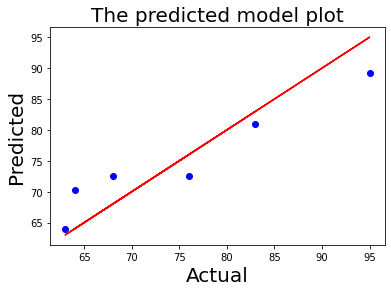

In [153]:
plt.scatter(x=y_test, y=lassopred, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

# Saving Final Model

In [155]:
import joblib
joblib.dump(lasso,'baseball.obj')

['baseball.obj']